In [1]:
import botorch
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f1 = lambda X: torch.cos(5*X[:,0])**2
f2 = lambda X: 1.5*torch.cos(5*X[:,0])**2
gen_inputs = lambda n: torch.rand(n,1)
gen_obs = lambda X, f, noise: f(X) + noise * torch.rand(X.shape[0])

In [6]:
X1, X2 = gen_inputs(20), gen_inputs(40)
i1, i2 = torch.zeros(20,1), torch.ones(40,1)

train_X = torch.cat([
    torch.cat([X1,i1], -1), torch.cat([X2, i2], -1)
])

train_Y = torch.cat([f1(X1), f2(X2)]).unsqueeze(-1)

model = botorch.models.MultiTaskGP(train_X, train_Y, task_feature=-1, output_tasks=[1])
mll = ExactMarginalLogLikelihood(model.likelihood, model)
botorch.fit.fit_gpytorch_model(mll);

In [9]:
X = gen_inputs(100)
p = model.posterior(X)
p.sample().shape

torch.Size([1, 100, 1])

/Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.7/lib/python3.7/site-packages/gpytorch/lazy/lazy_tensor.py:1356: NumericalWarning: Runtime Error when computing Cholesky decomposition: Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(3,3) is zero, singular U.. Using RootDecomposition.
  NumericalWarning,


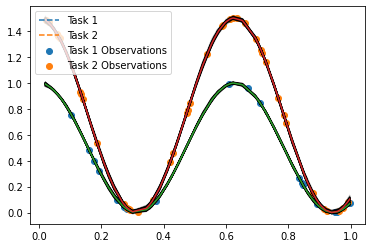

In [198]:
fig, ax = plt.subplots(1)

# Ground truth
X_plot,_ = gen_inputs(100).sort(0)
ax.plot(X_plot, f1(X_plot), '--', label="Task 1", alpha=1)
ax.plot(X_plot, f2(X_plot), '--', label="Task 2", alpha=1)

# Observations
ax.scatter(X1, f1(X1), label="Task 1 Observations")
ax.scatter(X2, f2(X2), label="Task 2 Observations")

# Posterior task 2
with torch.no_grad():
    posterior = model.posterior(X_plot)
    for i in range(100):
        ax.plot(X_plot, posterior.sample()[0,:,0], alpha=0.2, color='k')
    for i in range(100):
        ax.plot(X_plot, posterior.sample()[0,:,1], alpha=0.2, color='k')
    ax.plot(X_plot, posterior.mean.detach())
ax.legend(loc='best')